# Data Acquisition:
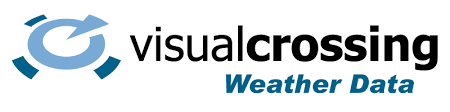
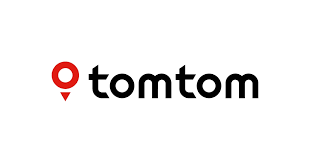

## Weather

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [1]:
#barcelonaweather.csv
#weatherbarcelona2015-2024.csv

In [2]:
#df1 = pd.read_csv('barcelonaweather.csv')
#df1

## ! Our weather dataframe from 2017 to 2024 !

In [3]:
df2 = pd.read_csv('weatherbarcelona2017-2024.csv')
df2

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,barcelona,2019-02-22,20.5,6.0,13.0,20.5,3.3,12.6,5.7,63.4,...,13.8,6,NaN,2019-02-22T07:37:04,2019-02-22T18:33:13,0.59,Clear,Clear conditions throughout the day.,clear-day,"LEBL,D1298,08186099999,LEGE,08180099999,081840..."
1,barcelona,2019-02-23,18.9,8.2,13.1,18.9,6.6,12.8,6.1,64.0,...,13.4,6,NaN,2019-02-23T07:35:36,2019-02-23T18:34:26,0.63,Clear,Clear conditions throughout the day.,clear-day,"LEBL,D1298,08186099999,LEGE,08180099999,081840..."
2,barcelona,2019-02-24,15.2,7.2,11.4,15.2,5.6,10.9,6.2,71.5,...,13.8,6,NaN,2019-02-24T07:34:07,2019-02-24T18:35:38,0.66,Clear,Clear conditions throughout the day.,clear-day,"LEBL,D1298,08186099999,LEGE,08180099999,081840..."
3,barcelona,2019-02-25,16.1,5.7,10.7,16.1,3.1,10.2,6.4,74.8,...,13.2,6,NaN,2019-02-25T07:32:37,2019-02-25T18:36:49,0.69,Clear,Clear conditions throughout the day.,clear-day,"LEBL,D1298,08186099999,LEGE,08180099999,AR110,..."
4,barcelona,2019-02-26,18.0,7.3,12.3,18.0,5.2,11.7,5.9,66.6,...,14.7,6,NaN,2019-02-26T07:31:06,2019-02-26T18:38:01,0.75,Clear,Clear conditions throughout the day.,clear-day,"LEBL,D1298,08186099999,LEGE,08180099999,AR110,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,barcelona,2024-02-18,17.6,7.7,12.7,17.6,5.8,12.4,6.7,68.1,...,11.4,5,10.0,2024-02-18T07:43:06,2024-02-18T18:28:08,0.29,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"LEBL,D1298,LEGE,08184099999,LELL,V7DJ5,0818109..."
2606,barcelona,2024-02-19,18.0,9.7,13.2,18.0,9.7,13.2,6.7,65.6,...,9.0,5,10.0,2024-02-19T07:41:42,2024-02-19T18:29:21,0.33,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"LEBL,D1298,LEGE,08184099999,LELL,V7DJ5,0818109..."
2607,barcelona,2024-02-20,17.4,8.7,12.3,17.4,7.0,11.8,6.5,68.7,...,11.5,6,10.0,2024-02-20T07:40:18,2024-02-20T18:30:35,0.36,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,LEGE,08184099999,LELL,08181099999,0..."
2608,barcelona,2024-02-21,18.1,7.4,12.1,18.1,5.6,12.0,8.0,76.5,...,11.0,6,10.0,2024-02-21T07:38:52,2024-02-21T18:31:48,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,LEGE,LELL,V7DJ5"


In [4]:
df2.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

### ! Columns !
name: The name of the location or city (in this case, Barcelona).  
datetime: The date and time the weather information was recorded.  
tempmax: The maximum temperature recorded in the specified time interval.  
tempmin: The minimum temperature recorded in the specified time interval.  
temp: The average temperature recorded over the specified time interval.  
feelslikemax: The maximum felt temperature recorded in the specified time interval.  
feelslikemin: The lowest felt temperature recorded in the specified time interval.  
feelslike: The average felt temperature recorded over the specified time interval.  
dew: The dew point, which is the temperature at which moist air becomes saturated and begins to condense.  
humidity: The relative humidity of the air.  
precip: The amount of precipitation (rain) recorded in the specified time interval.  
preciprob: The probability of precipitation in the specified time interval.  
precipcover: The precipitation coverage in the specified time interval.  
preciptype: The type of precipitation (for example, rain, snow, hail) recorded in the specified time interval.  
snow: The amount of snow recorded in the specified time interval.  
snowdepth: The snow depth recorded in the specified time interval.  
windgust: The maximum wind gust recorded in the specified time interval.  
windspeed: The average wind speed recorded over the specified time interval.  
winddir: The wind direction recorded in the specified time interval.  
sealevelpressure: The atmospheric pressure at sea level recorded over the specified time interval.  
cloudcover: The cloud cover in the specified time interval.  
visibility: The visibility recorded in the specified time interval.  
solarradiation: The solar radiation recorded in the specified time interval.  
solarenergy: The solar energy recorded in the specified time interval.  
uvindex: The UV index recorded over the specified time interval.  
severerisk: The severe weather risk in the specified time range.  
sunrise: The time of sunrise in the specified time range.  
sunset: The time the sun sets in the specified time range.  
moonphase: The phase of the moon in the specified time range.  
conditions: The general weather conditions in the specified time range.  
description: A more detailed description of the weather conditions in the specified time range.  
icon: An icon representative of the weather conditions in the specified time range.  
stations: The weather stations involved in data collection.  

## Traffic

In [5]:
#tomtom_trafic_index.csv

In [6]:
dftom = pd.read_csv('tomtom_trafic_index.csv')
dftom

,country,city,date,congestion,diffRatio
0,Argentina,Buenos Aires,2019-12-30,27,0.000000
1,Argentina,Buenos Aires,2019-12-31,10,-0.655172
2,Argentina,Buenos Aires,2020-01-01,6,-0.806452
3,Argentina,Buenos Aires,2020-01-02,18,-0.454545
4,Argentina,Buenos Aires,2020-01-03,21,-0.400000
...,...,...,...,...,...
457088,United States of America,Worcester,2023-02-09,15,-0.166667
457089,United States of America,Worcester,2023-02-10,18,-0.142857
457090,United States of America,Worcester,2023-02-11,9,-0.181818
457091,United States of America,Worcester,2023-02-12,5,-0.500000


## ! Our traffic dataframe from 2019 to 2023 !

In [7]:
# Filter rows for Barcelona
dftom_barcelona = dftom[dftom['city'] == 'Barcelona']
dftom_barcelona

,country,city,date,congestion,diffRatio
275214,Spain,Barcelona,2019-12-30,21,-0.250000
275215,Spain,Barcelona,2019-12-31,15,-0.500000
275216,Spain,Barcelona,2020-01-01,7,-0.774194
275217,Spain,Barcelona,2020-01-02,21,-0.322581
275218,Spain,Barcelona,2020-01-03,20,-0.375000
...,...,...,...,...,...
276346,Spain,Barcelona,2023-02-09,30,-0.032258
276347,Spain,Barcelona,2023-02-10,26,-0.187500
276348,Spain,Barcelona,2023-02-11,17,0.062500
276349,Spain,Barcelona,2023-02-12,10,-0.166667


## Combination weather & traffic

In [8]:
dftom_barcelona.date.min()

'2019-12-30'

In [9]:
dftom_barcelona.date.max()

'2023-02-13'

In [10]:
df2.datetime.min()

'2017-02-22'

In [11]:
df2.datetime.max()

'2024-02-22'

In [12]:
# Combination of the 2 dataframes on the date

combined_df = pd.merge(df2, dftom_barcelona, left_on='datetime', right_on='date')
combined_df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,moonphase,conditions,description,icon,stations,country,city,date,congestion,diffRatio
0,barcelona,2019-12-30,16.2,6.7,10.8,16.2,4.3,10.3,7.4,79.8,...,0.14,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,08186099999,LEGE,08180099999,081840...",Spain,Barcelona,2019-12-30,21,-0.250000
1,barcelona,2019-12-31,14.9,4.9,8.3,14.9,1.7,6.5,5.1,80.9,...,0.17,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,LEGE,08184099999,LELL,V7DJ5,0818109...",Spain,Barcelona,2019-12-31,15,-0.500000
2,barcelona,2020-01-01,13.3,4.1,8.3,13.3,1.4,7.3,5.3,81.5,...,0.20,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,C8593,D1298,LEGE,08186099999,08180099999,...",Spain,Barcelona,2020-01-01,7,-0.774194
3,barcelona,2020-01-02,13.6,3.0,8.3,13.6,-0.4,7.1,5.4,82.6,...,0.23,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,08186099999,LEGE,08180099999,081840...",Spain,Barcelona,2020-01-02,21,-0.322581
4,barcelona,2020-01-03,13.0,5.1,9.1,13.0,1.9,8.2,5.2,77.5,...,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,08186099999,LEGE,08180099999,081840...",Spain,Barcelona,2020-01-03,20,-0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,barcelona,2023-02-11,15.2,0.2,6.1,15.2,-3.9,4.2,0.4,68.2,...,0.70,Clear,Clear conditions throughout the day.,clear-day,"LEBL,D1298,LEGE,08184099999,LELL,V7DJ5,0818109...",Spain,Barcelona,2023-02-11,17,0.062500
1177,barcelona,2023-02-12,12.9,0.4,6.1,12.9,-3.8,4.3,0.7,70.2,...,0.73,Clear,Clear conditions throughout the day.,clear-day,"LEBL,D1298,LEGE,08184099999,LELL,08181099999,0...",Spain,Barcelona,2023-02-12,10,-0.166667
1178,barcelona,2023-02-12,12.9,0.4,6.1,12.9,-3.8,4.3,0.7,70.2,...,0.73,Clear,Clear conditions throughout the day.,clear-day,"LEBL,D1298,LEGE,08184099999,LELL,08181099999,0...",Spain,Barcelona,2023-02-12,10,-0.166667
1179,barcelona,2023-02-13,13.5,1.1,6.8,13.5,-2.5,5.3,2.4,74.8,...,0.75,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"LEBL,D1298,LEGE,08184099999,LELL,08181099999,0...",Spain,Barcelona,2023-02-13,27,-0.035714


In [13]:
combined_df.datetime.min()

'2019-12-30'

In [14]:
combined_df.datetime.max()

'2023-02-13'

In [15]:
# Check duplicates
print("Duplicate rows:", combined_df.duplicated().sum())

Duplicate rows: 44


In [16]:
# Remove duplicates
combined_df_no_duplicates = combined_df.drop_duplicates()
combined_df_no_duplicates

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,moonphase,conditions,description,icon,stations,country,city,date,congestion,diffRatio
0,barcelona,2019-12-30,16.2,6.7,10.8,16.2,4.3,10.3,7.4,79.8,...,0.14,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,08186099999,LEGE,08180099999,081840...",Spain,Barcelona,2019-12-30,21,-0.250000
1,barcelona,2019-12-31,14.9,4.9,8.3,14.9,1.7,6.5,5.1,80.9,...,0.17,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,LEGE,08184099999,LELL,V7DJ5,0818109...",Spain,Barcelona,2019-12-31,15,-0.500000
2,barcelona,2020-01-01,13.3,4.1,8.3,13.3,1.4,7.3,5.3,81.5,...,0.20,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,C8593,D1298,LEGE,08186099999,08180099999,...",Spain,Barcelona,2020-01-01,7,-0.774194
3,barcelona,2020-01-02,13.6,3.0,8.3,13.6,-0.4,7.1,5.4,82.6,...,0.23,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,08186099999,LEGE,08180099999,081840...",Spain,Barcelona,2020-01-02,21,-0.322581
4,barcelona,2020-01-03,13.0,5.1,9.1,13.0,1.9,8.2,5.2,77.5,...,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,08186099999,LEGE,08180099999,081840...",Spain,Barcelona,2020-01-03,20,-0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,barcelona,2023-02-09,13.9,4.9,8.8,13.9,2.6,7.5,2.2,63.7,...,0.63,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"LEBL,D1298,LEGE,AR110,08184099999,LELL,V7DJ5,0...",Spain,Barcelona,2023-02-09,30,-0.032258
1173,barcelona,2023-02-10,15.4,2.3,7.6,15.4,-0.7,6.2,2.3,70.6,...,0.66,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LEBL,D1298,LEGE,AR110,08184099999,LELL,V7DJ5,0...",Spain,Barcelona,2023-02-10,26,-0.187500
1175,barcelona,2023-02-11,15.2,0.2,6.1,15.2,-3.9,4.2,0.4,68.2,...,0.70,Clear,Clear conditions throughout the day.,clear-day,"LEBL,D1298,LEGE,08184099999,LELL,V7DJ5,0818109...",Spain,Barcelona,2023-02-11,17,0.062500
1177,barcelona,2023-02-12,12.9,0.4,6.1,12.9,-3.8,4.3,0.7,70.2,...,0.73,Clear,Clear conditions throughout the day.,clear-day,"LEBL,D1298,LEGE,08184099999,LELL,08181099999,0...",Spain,Barcelona,2023-02-12,10,-0.166667


In [17]:
print("original dataframe:", combined_df.shape)
print("dataframe without duplicates:", combined_df_no_duplicates.shape)

original dataframe: (1181, 38)
dataframe without duplicates: (1137, 38)


In [18]:
# Save in csv file
file_path = 'combined_data.csv'
combined_df_no_duplicates.to_csv(file_path, index=False)
print("The combined dataframe is saved succesfully in the file:", file_path)

The combined dataframe is saved succesfully in the file: combined_data.csv


In [19]:
# Missing values
missing_values = combined_df_no_duplicates.isnull().sum()
missing_values

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          717
snow                  0
snowdepth             0
windgust              6
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk          737
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
country               0
city                  0
date                  0
congestion            0
diffRatio             0
dtype: int64

In [20]:
selected_columns = ['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 
                    'dew', 'humidity', 'precip', 'precipprob', 'snowdepth', 'windgust', 'windspeed', 'winddir', 
                    'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 
                    'moonphase', 'conditions', 'description', 'congestion', 'diffRatio']

combined_df_selected = combined_df_no_duplicates.loc[:, selected_columns]
combined_df_selected

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,conditions,description,congestion,diffRatio
0,2019-12-30,16.2,6.7,10.8,16.2,4.3,10.3,7.4,79.8,0.00,...,44.4,11.8,47.6,4.1,4,0.14,Partially cloudy,Partly cloudy throughout the day.,21,-0.250000
1,2019-12-31,14.9,4.9,8.3,14.9,1.7,6.5,5.1,80.9,0.00,...,42.7,11.2,64.3,5.6,4,0.17,Partially cloudy,Partly cloudy throughout the day.,15,-0.500000
2,2020-01-01,13.3,4.1,8.3,13.3,1.4,7.3,5.3,81.5,0.00,...,27.2,12.2,78.3,6.7,4,0.20,Partially cloudy,Partly cloudy throughout the day.,7,-0.774194
3,2020-01-02,13.6,3.0,8.3,13.6,-0.4,7.1,5.4,82.6,0.00,...,49.4,10.8,63.1,5.5,4,0.23,Partially cloudy,Partly cloudy throughout the day.,21,-0.322581
4,2020-01-03,13.0,5.1,9.1,13.0,1.9,8.2,5.2,77.5,0.00,...,53.3,14.9,67.3,5.9,3,0.25,Partially cloudy,Partly cloudy throughout the day.,20,-0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,2023-02-09,13.9,4.9,8.8,13.9,2.6,7.5,2.2,63.7,0.65,...,61.5,16.8,92.4,7.9,5,0.63,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,30,-0.032258
1173,2023-02-10,15.4,2.3,7.6,15.4,-0.7,6.2,2.3,70.6,0.00,...,28.3,14.5,124.3,10.6,5,0.66,Partially cloudy,Partly cloudy throughout the day.,26,-0.187500
1175,2023-02-11,15.2,0.2,6.1,15.2,-3.9,4.2,0.4,68.2,0.00,...,5.6,14.1,136.1,11.7,5,0.70,Clear,Clear conditions throughout the day.,17,0.062500
1177,2023-02-12,12.9,0.4,6.1,12.9,-3.8,4.3,0.7,70.2,0.00,...,5.1,14.2,141.6,12.1,5,0.73,Clear,Clear conditions throughout the day.,10,-0.166667


### ! Correlation analysis !
Correlations between variables in the dataset to better understand the relationships between them. For example, check whether there is a correlation between weather conditions and traffic congestion levels.

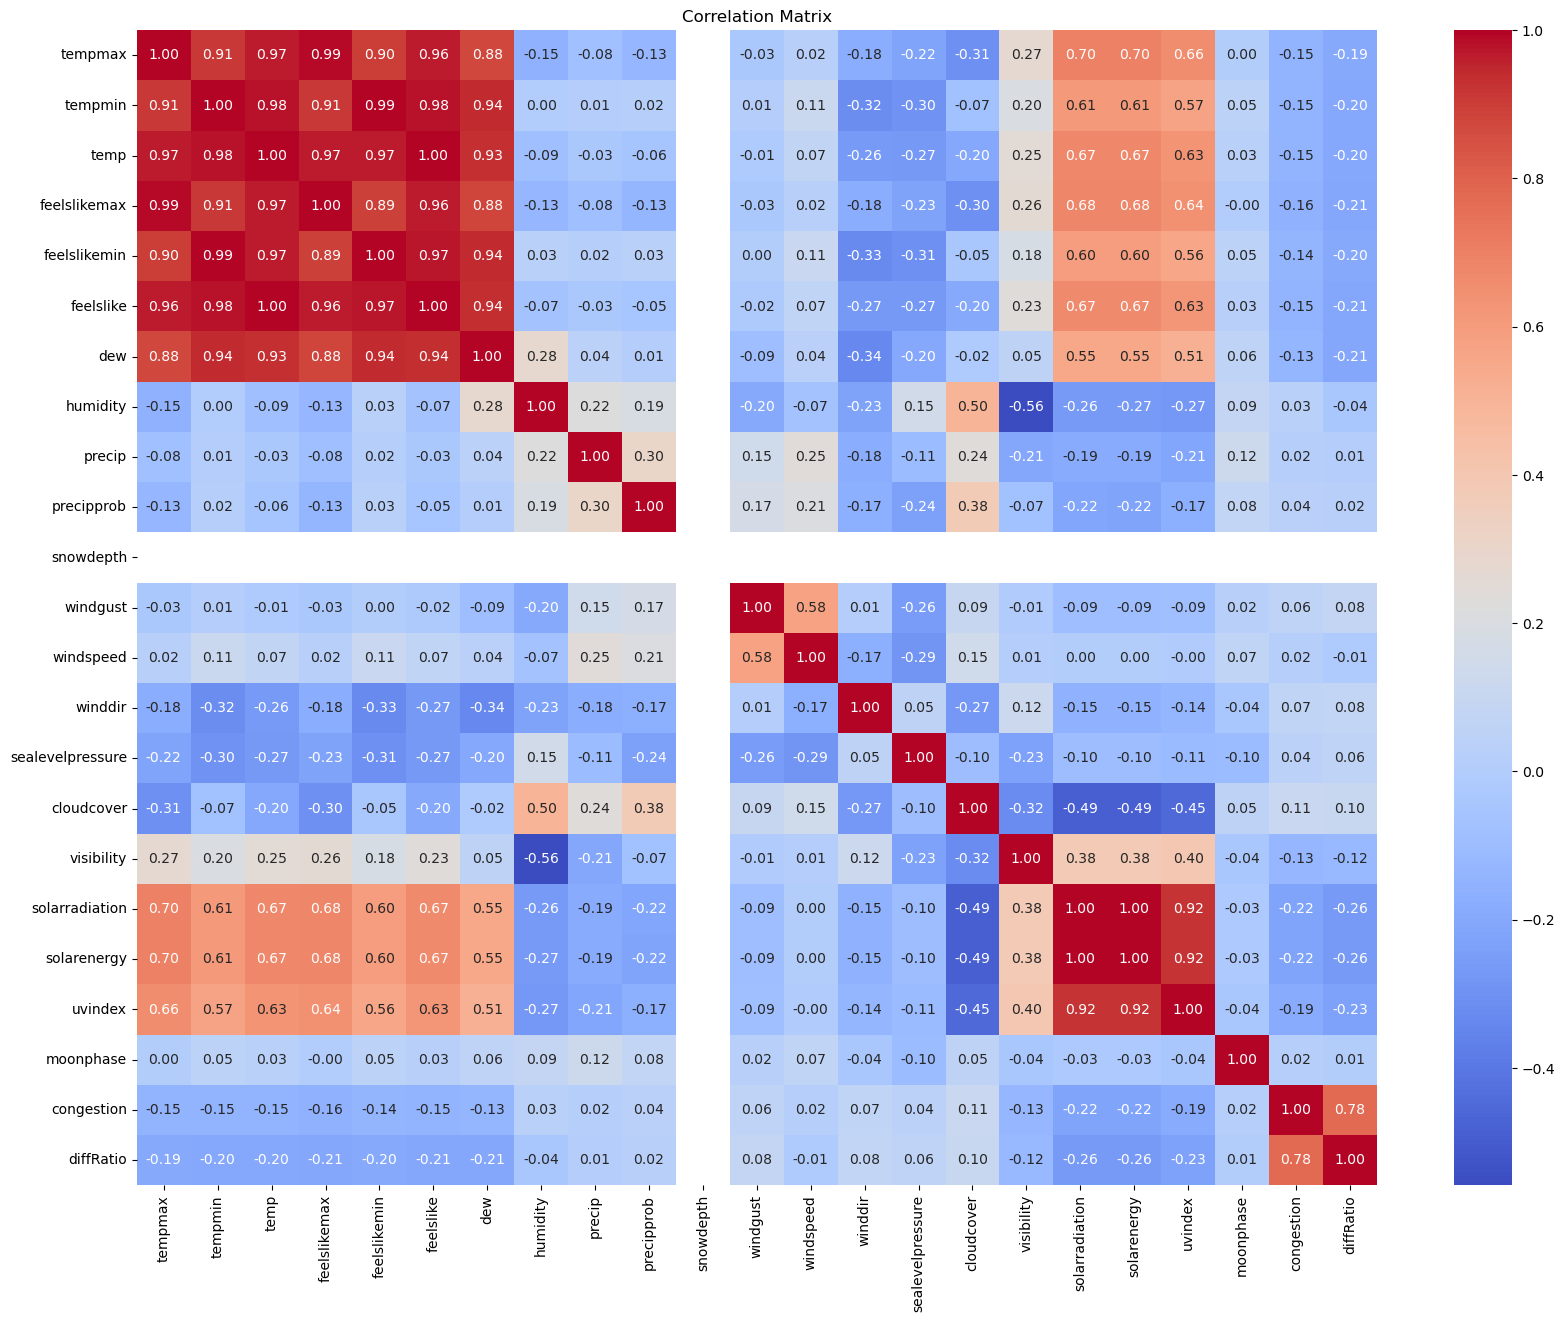

In [21]:
correlation_matrix = combined_df_selected.corr(numeric_only=True)
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [22]:
correlation_matrix

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,congestion,diffRatio
tempmax,1.000000,0.914012,0.969023,0.990393,0.900121,0.963482,0.876075,-0.153747,-0.082727,-0.130773,...,-0.177089,-0.221774,-0.305897,0.271012,0.697101,0.696955,0.657731,0.003748,-0.148569,-0.193499
tempmin,0.914012,1.000000,0.976511,0.912703,0.994566,0.975859,0.939830,0.000372,0.010852,0.016116,...,-0.320564,-0.300423,-0.072075,0.201217,0.607827,0.607435,0.569715,0.045121,-0.146229,-0.204224
temp,0.969023,0.976511,1.000000,0.965030,0.967358,0.997518,0.929933,-0.088140,-0.033553,-0.055765,...,-0.263822,-0.266249,-0.204910,0.251615,0.674821,0.674557,0.634431,0.027554,-0.148934,-0.201735
feelslikemax,0.990393,0.912703,0.965030,1.000000,0.894696,0.963866,0.881535,-0.131626,-0.084589,-0.132719,...,-0.178811,-0.225270,-0.303673,0.261053,0.682328,0.682095,0.644024,-0.000872,-0.160584,-0.210807
feelslikemin,0.900121,0.994566,0.967358,0.894696,1.000000,0.969908,0.940446,0.027230,0.015129,0.030478,...,-0.333004,-0.307106,-0.045804,0.182688,0.597970,0.597577,0.560775,0.048716,-0.140716,-0.197866
feelslike,0.963482,0.975859,0.997518,0.963866,0.969908,1.000000,0.935561,-0.066418,-0.034062,-0.052383,...,-0.269023,-0.269568,-0.195075,0.234982,0.667023,0.666700,0.626981,0.025214,-0.149593,-0.205772
dew,0.876075,0.939830,0.929933,0.881535,0.940446,0.935561,1.000000,0.281607,0.042503,0.011433,...,-0.336096,-0.201982,-0.016438,0.052376,0.553473,0.553023,0.513747,0.058904,-0.133055,-0.209874
humidity,-0.153747,0.000372,-0.088140,-0.131626,0.027230,-0.066418,0.281607,1.000000,0.224374,0.188275,...,-0.225836,0.150722,0.495298,-0.558221,-0.264787,-0.265354,-0.273189,0.086527,0.030877,-0.038322
precip,-0.082727,0.010852,-0.033553,-0.084589,0.015129,-0.034062,0.042503,0.224374,1.000000,0.304418,...,-0.176995,-0.105897,0.235051,-0.206999,-0.188189,-0.188433,-0.212472,0.124533,0.015255,0.008211
precipprob,-0.130773,0.016116,-0.055765,-0.132719,0.030478,-0.052383,0.011433,0.188275,0.304418,1.000000,...,-0.174666,-0.238522,0.378790,-0.071417,-0.216690,-0.217831,-0.170398,0.078490,0.037194,0.023710


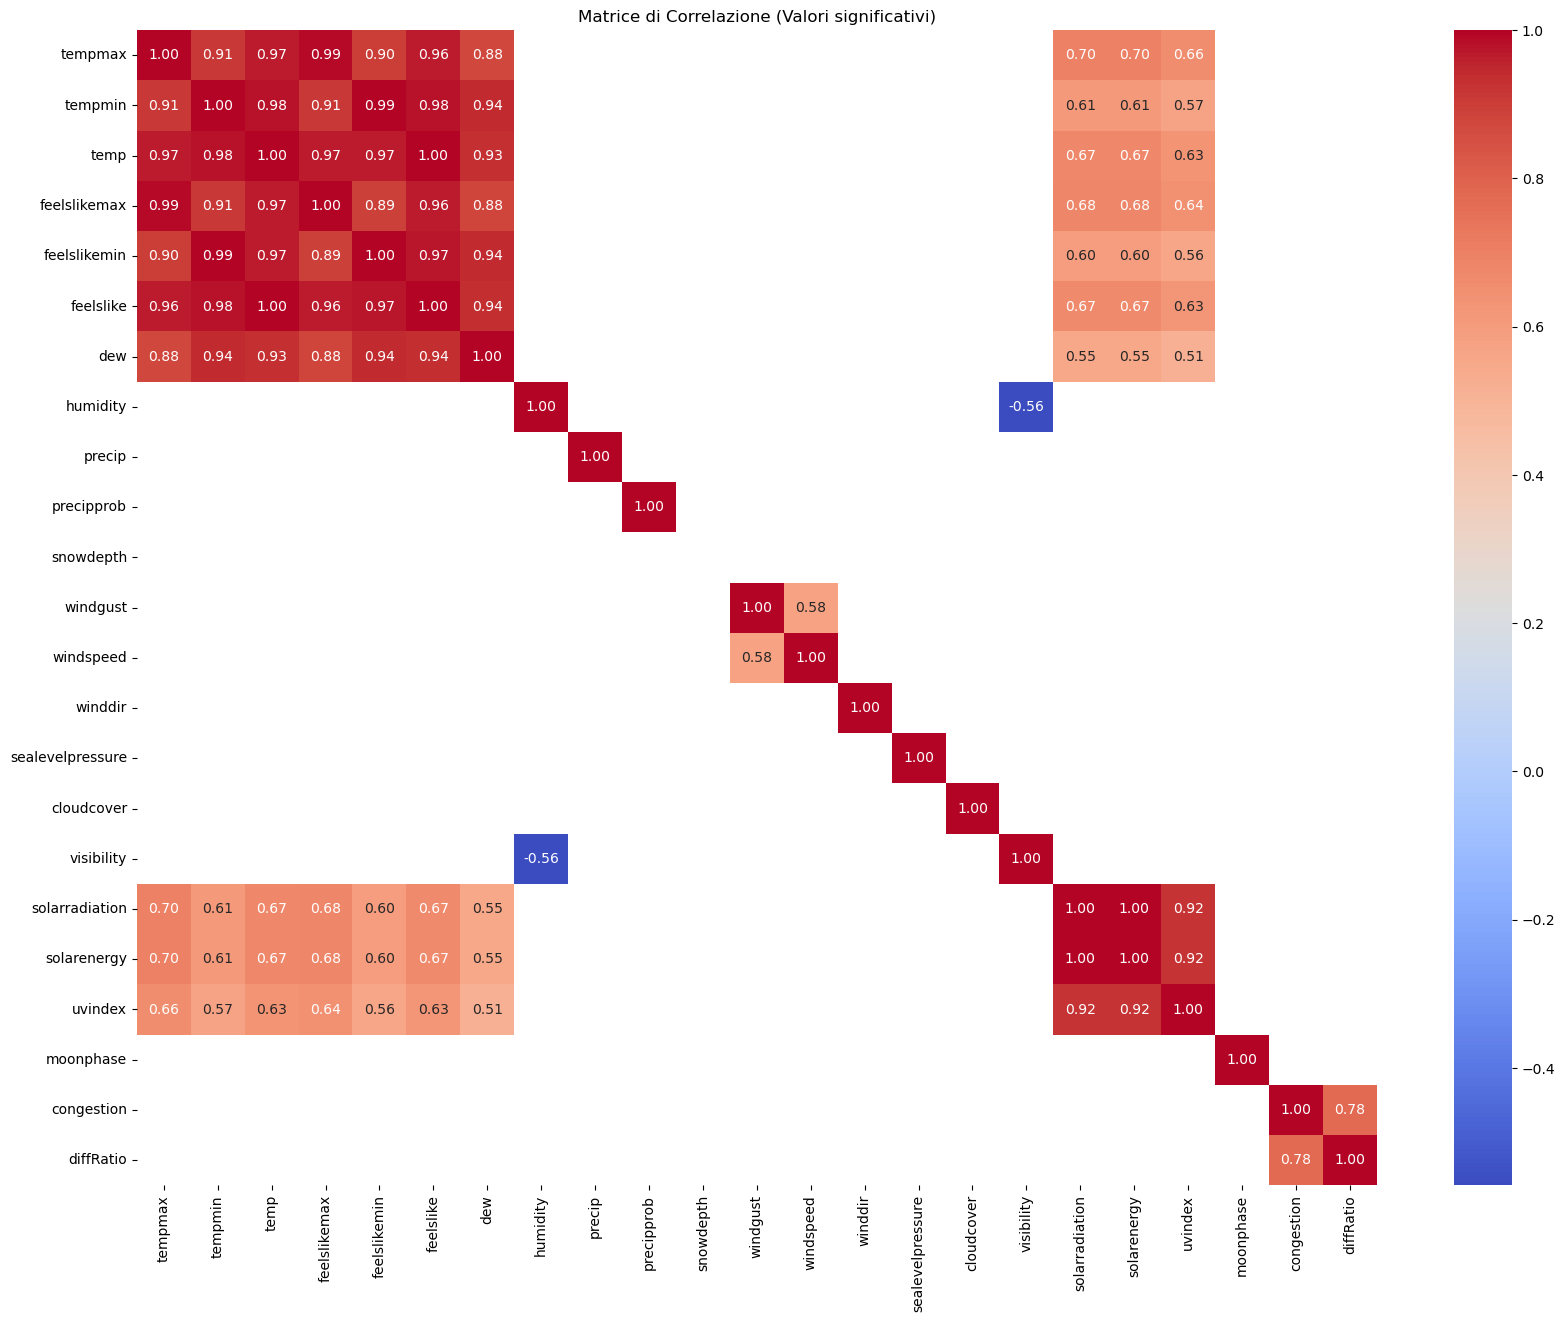

In [23]:
# Select only corr >0.5 or <-0.5
significant_corr = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
plt.figure(figsize=(20, 15))
sns.heatmap(significant_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione (Valori significativi)')
plt.show()

In [24]:
# Corr only with congestion
numeric_columns = combined_df_selected.select_dtypes(include='number')
correlation_with_congestion = numeric_columns.corrwith(combined_df_selected['congestion'])
significant_correlation_with_congestion = correlation_with_congestion[(correlation_with_congestion > 0.5) | (correlation_with_congestion < -0.5)]
print("Significant correlations with 'congestion':")
print(significant_correlation_with_congestion)

Significant correlations with 'congestion':
congestion    1.000000
diffRatio     0.776602
dtype: float64


In [25]:
selected_columns = ['precip', 'precipprob', 'precipcover', 'congestion']

selected_df = combined_df_no_duplicates[selected_columns]

#selected_df['precip'] = pd.to_numeric(selected_df['precip'], errors='coerce')

correlation_matrix = selected_df.corr()

# Corr >0.5 or <-0.5
significant_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
print(significant_correlations)

               precip  precipprob  precipcover  congestion
precip       1.000000         NaN     0.709681         NaN
precipprob        NaN    1.000000     0.620344         NaN
precipcover  0.709681    0.620344     1.000000         NaN
congestion        NaN         NaN          NaN         1.0


## ! Conclusion !
The weather and the data traffic are not correlated so that we decide to use only the weather data to predict the weather and separately only the traffic data to predict the traffic.

# ! Next step !
Again, the traffic data from tom-tom are not really useful, so the next step is to replace them with the new traffic data (from 2021 to 2024).  
After having replaced the old traffic data with the new ones, to predict the weather we continue to use only the weather data (because they don't depend on the traffic), instead to predict the traffic we will use both the traffic and the weather data (because the traffic should depend also on the weather, for example if it rains).  
Regarding the weather prediction we are focusing on 3 predictive models: for temperature, humidity and cloud cover.

### Next steps:

2) Traffic trends based on weather conditions:  
Examine how weather conditions affect traffic levels.  
For example, try to understand whether there is an increase in traffic congestion during rainy days or during extreme temperatures.

3) Time analysis:  
Analyze data over time to identify any trends or seasonality in traffic levels and weather conditions.  

4) Analysis of traffic conditions by day of the week:  
Examine whether there are differences in traffic levels by day of the week and whether these differences are related to particular weather conditions.

5) Geospatial visualizations:  
Geospatial maps to visualize data on traffic and weather conditions in different areas of Barcelona and identify any spatial patterns.

#### Precipitation analysis:

- Statistical Description of Precipitation:  
Descriptive statistics such as mean, standard deviation, minimum, maximum, etc., to better understand the distribution of precipitation in the period considered.

- Precipitation Distribution Visualization

- Analysis of Rainfall Temporal Trends:  
Examine whether there are temporal trends or patterns in precipitation over years or months.

- Correlation with other Meteorological Variables:  
Examine the correlation of precipitation with other meteorological variables present in the dataset, such as temperature, humidity, etc.

- Search for Anomalous Events or Outliers:  
Identify any anomalous precipitation events or outliers that may have had a significant impact on the analysis.

In [26]:
# Statistical Description of Precipitation
precipitation_stats = combined_df_selected['precip'].describe()
precipitation_stats

count    1137.000000
mean        1.576183
std         7.354675
min         0.000000
25%         0.000000
50%         0.000000
75%         0.054000
max       102.718000
Name: precip, dtype: float64

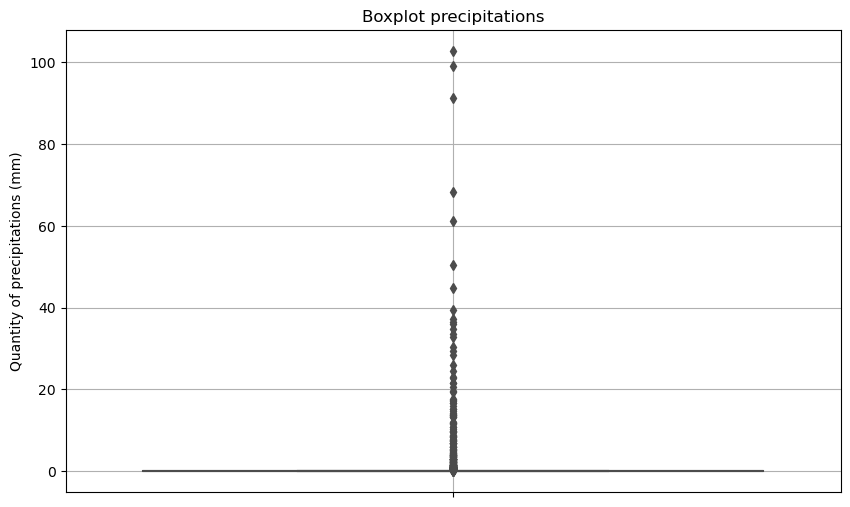

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df_selected, y='precip', color='blue')
plt.title('Boxplot precipitations')
plt.ylabel('Quantity of precipitations (mm)')
plt.grid(True)
plt.show()

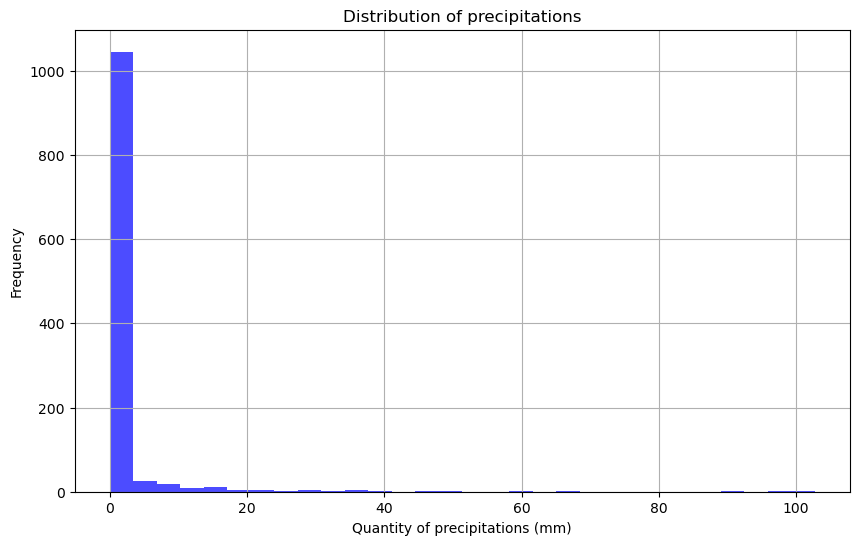

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(combined_df_selected['precip'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of precipitations')
plt.xlabel('Quantity of precipitations (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [29]:
print(combined_df_selected['datetime'].dtype)
print(combined_df_selected['precip'].dtype)

object
float64


In [30]:
a = combined_df_selected.copy()
a.set_index('datetime', inplace=True)
a

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,conditions,description,congestion,diffRatio
datetime,,,,,,,,,,,,,,,,,,,,,
2019-12-30,16.2,6.7,10.8,16.2,4.3,10.3,7.4,79.8,0.00,0,...,44.4,11.8,47.6,4.1,4,0.14,Partially cloudy,Partly cloudy throughout the day.,21,-0.250000
2019-12-31,14.9,4.9,8.3,14.9,1.7,6.5,5.1,80.9,0.00,0,...,42.7,11.2,64.3,5.6,4,0.17,Partially cloudy,Partly cloudy throughout the day.,15,-0.500000
2020-01-01,13.3,4.1,8.3,13.3,1.4,7.3,5.3,81.5,0.00,0,...,27.2,12.2,78.3,6.7,4,0.20,Partially cloudy,Partly cloudy throughout the day.,7,-0.774194
2020-01-02,13.6,3.0,8.3,13.6,-0.4,7.1,5.4,82.6,0.00,0,...,49.4,10.8,63.1,5.5,4,0.23,Partially cloudy,Partly cloudy throughout the day.,21,-0.322581
2020-01-03,13.0,5.1,9.1,13.0,1.9,8.2,5.2,77.5,0.00,0,...,53.3,14.9,67.3,5.9,3,0.25,Partially cloudy,Partly cloudy throughout the day.,20,-0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-09,13.9,4.9,8.8,13.9,2.6,7.5,2.2,63.7,0.65,100,...,61.5,16.8,92.4,7.9,5,0.63,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,30,-0.032258
2023-02-10,15.4,2.3,7.6,15.4,-0.7,6.2,2.3,70.6,0.00,0,...,28.3,14.5,124.3,10.6,5,0.66,Partially cloudy,Partly cloudy throughout the day.,26,-0.187500
2023-02-11,15.2,0.2,6.1,15.2,-3.9,4.2,0.4,68.2,0.00,0,...,5.6,14.1,136.1,11.7,5,0.70,Clear,Clear conditions throughout the day.,17,0.062500


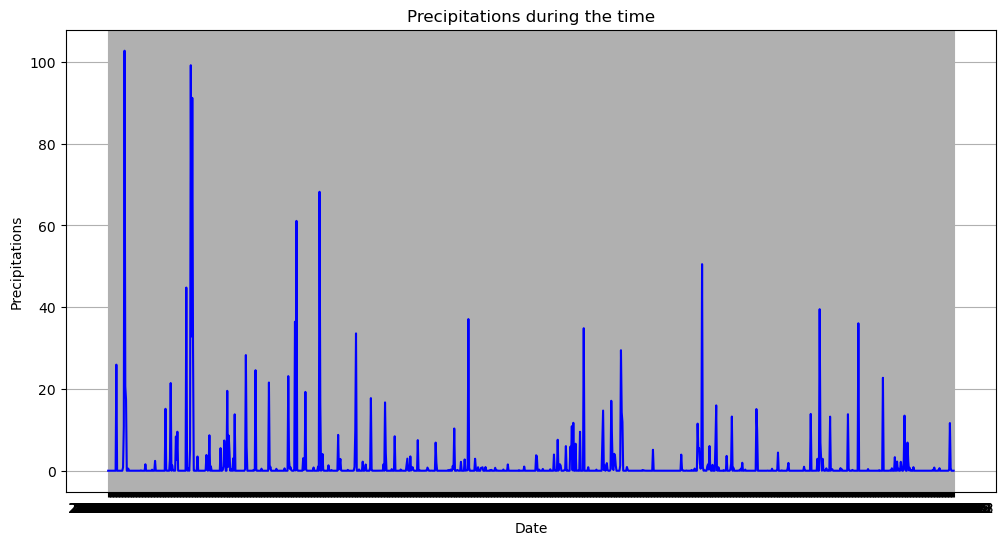

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(np.array(a.index), np.array(a['precip']), color='blue')
plt.title('Precipitations during the time')
plt.xlabel('Date')
plt.ylabel('Precipitations')
plt.grid(True)
plt.show()

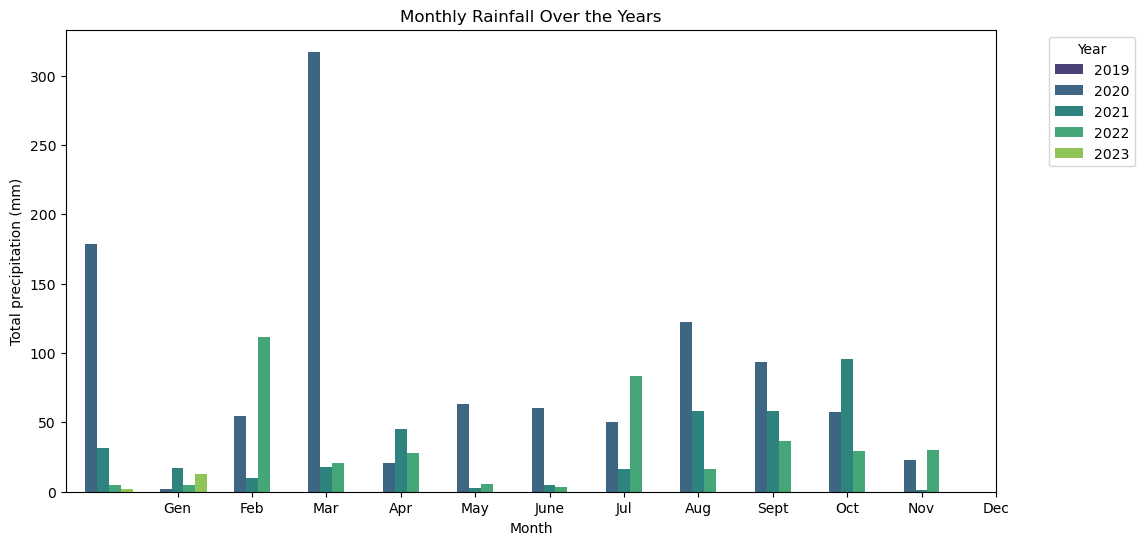

In [32]:
# Monthly Rainfall Over the Years

a.index = pd.to_datetime(a.index)

# Add year and month columns
a['Year'] = a.index.year
a['Month'] = a.index.month

# Calculating the total amount of precipitation for each month over the years
monthly_precip = a.groupby(['Year', 'Month'])['precip'].sum().reset_index()

# Bar graph of monthly precipitation over the years
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_precip, x='Month', y='precip', hue='Year', palette='viridis')
plt.title('Monthly Rainfall Over the Years')
plt.xlabel('Month')
plt.ylabel('Total precipitation (mm)')
plt.xticks(ticks=range(1, 13), labels=['Gen', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

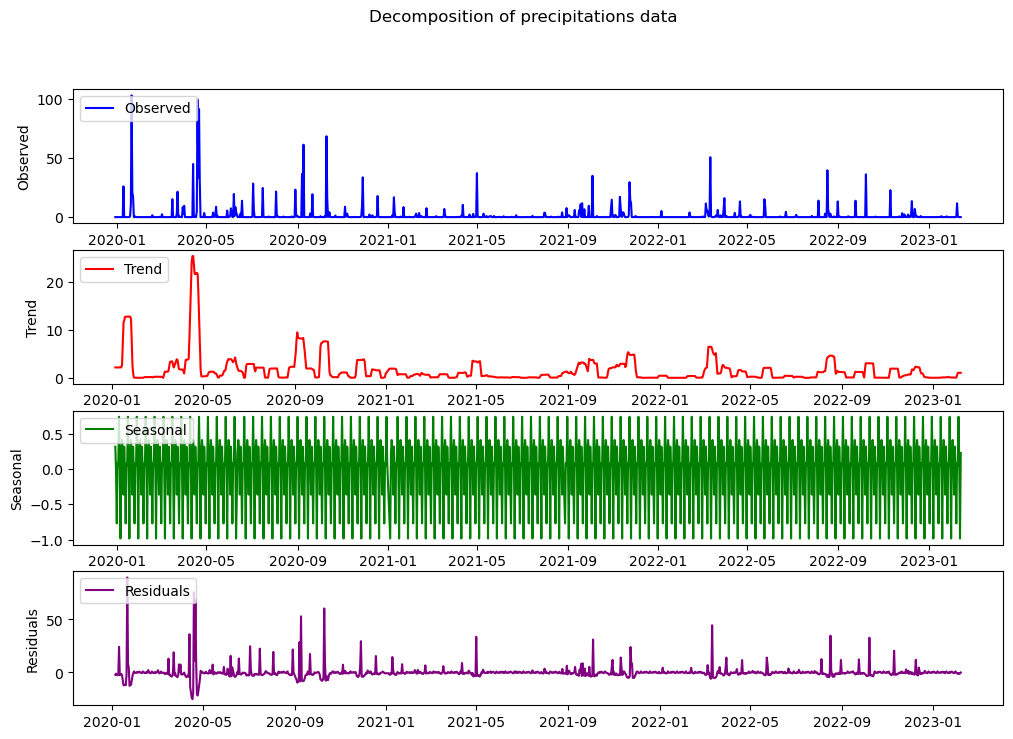

In [33]:
# Seasonality analysis: Decomposition of data into trends, seasonality and residuals

result = seasonal_decompose(a['precip'], model='additive', period=12)  #12 months

# Plot decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(result.observed, label='Observed', color='blue')
plt.legend(loc='upper left')
plt.ylabel('Observed')

plt.subplot(412)
plt.plot(result.trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.ylabel('Trend')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.ylabel('Seasonal')

plt.subplot(414)
plt.plot(result.resid, label='Residuals', color='purple')
plt.legend(loc='upper left')
plt.ylabel('Residuals')

plt.suptitle('Decomposition of precipitations data')
plt.show()

## DUE TO THERE IS NO CORRELATION BETWEEN TRAFFIC WITH THE WEATHER FEATURES. LETS DO AN ISOLATE FORECAST: JUST THE WEATHER AND JUST THE TRAFFIC SEPARALETY 